In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("C:/Users/USER/py/projects/Copper_Modeling/data/Copper_Set.csv", low_memory=False)

In [2]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.1279489,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.4110654,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.5262616,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
data.shape

(181673, 14)

null values

In [4]:
null_values = data.isnull().sum()
print(null_values)

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


changing the datatype

In [6]:
import datetime as dt
import numpy as np

In [7]:

data['item_date'] = pd.to_datetime(data['item_date'],format='%Y%m%d',errors='coerce').dt.date
data['delivery date'] = pd.to_datetime(data['delivery date'],format='%Y%m%d',errors='coerce').dt.date
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors='coerce',downcast='float')
data['customer'] = pd.to_numeric(data['customer'], errors='coerce')
data['country'] = pd.to_numeric(data['country'], errors='coerce')
data['application'] = pd.to_numeric(data['application'], errors='coerce')
data['thickness'] = pd.to_numeric(data['thickness'], errors='coerce',downcast='float')
data['width'] = pd.to_numeric(data['width'], errors='coerce',downcast='float')
data['material_ref'] = data['material_ref'].str.lstrip('0')
data['product_ref'] = pd.to_numeric(data['product_ref'], errors='coerce')
data['selling_price'] = pd.to_numeric(data['selling_price'], errors='coerce',downcast='float')

In [8]:
data.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286865,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.573775,261.638916,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [9]:
#removing negative values
import numpy as np
data['quantity tons'] = data['quantity tons'].apply(lambda x: x if x > 0 else np.nan)
data['selling_price'] = data['selling_price'].apply(lambda x: x if x > 0 else np.nan)

In [10]:
print(data['quantity tons'].isna().sum())
print(data['selling_price'].isna().sum())

5
8


In [11]:
data = data.dropna(subset=['quantity tons','selling_price'])

In [12]:
print(data['quantity tons'].isna().sum())
print(data['selling_price'].isna().sum())

0
0


In [13]:
data.isnull().sum()

id                   2
item_date            3
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77912
product_ref          0
delivery date        3
selling_price        0
dtype: int64

In [14]:
#handling null values
data['material_ref'] = data['material_ref'].fillna("unknown")

In [15]:
data.isnull().sum()

id                2
item_date         3
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     0
dtype: int64

In [16]:
data = data.dropna()

In [17]:
data.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [18]:
#checking for duplicated rows
(data.duplicated()).sum()

0

In [172]:
data['status'].value_counts().index

Index(['Won', 'Lost', 'Not lost for AM', 'Revised', 'To be approved', 'Draft',
       'Offered', 'Offerable', 'Wonderful'],
      dtype='object', name='status')

In [174]:
data['item type'].value_counts().index

Index(['W', 'S', 'PL', 'Others', 'WI', 'IPL', 'SLAWR'], dtype='object', name='item type')

In [177]:
data['application'].unique()

array([10., 41., 28., 59., 15.,  4., 38., 56., 42., 26., 27., 19., 20.,
       66., 29., 22., 40., 25., 67., 79.,  3., 99.,  2.,  5., 39., 69.,
       70., 65., 58., 68.])

In [178]:
data['country'].unique()

array([ 28.,  25.,  30.,  32.,  38.,  78.,  27.,  77., 113.,  79.,  26.,
        39.,  40.,  84.,  80., 107.,  89.])

In [179]:
data['quantity tons'].min()

1e-05

In [180]:
data['quantity tons'].max()

1000000000.0

In [181]:
print(data['thickness'].min())
print(data['thickness'].max())

0.18000000715255737
400.0


In [182]:
print(data['width'].min())
print(data['width'].max())

1.0
2990.0


In [183]:
data['product_ref'].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642], dtype=int64)

In [184]:
print(data['selling_price'].min())
print(data['selling_price'].max())

0.1
100001015.0


In [202]:
data['customer'].value_counts

array([30156308., 30202938., 30153963., ..., 30349515., 30284694.,
       30161559.])

EDA

In [20]:
# plotting continous variable
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = data.copy()

In [114]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [115]:
df.drop(columns=['id'],inplace=True)

In [116]:
print('quantity tons:',df['quantity tons'].skew())
print('country:',df['country'].skew())
print('customer:',df['customer'].skew())
print('application:',df['application'].skew())
print('thickness:',df['thickness'].skew())
print('width:',df['width'].skew())
print('selling_price:',df['selling_price'].skew())

quantity tons: 424.62886378007687
country: 0.7535164382634496
customer: -149.0871412256045
application: 0.7243837140276725
thickness: 15.302911
width: 0.37481126
selling_price: 301.34412211966924


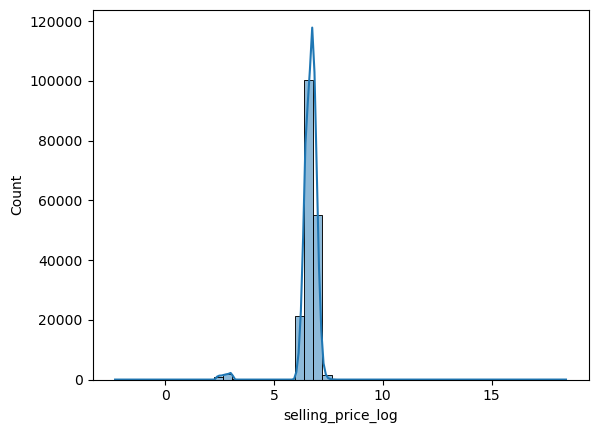

In [23]:
df['selling_price_log'] = np.log(df['selling_price'])
sns.histplot(df['selling_price_log'],kde=True,bins=50)
plt.show()

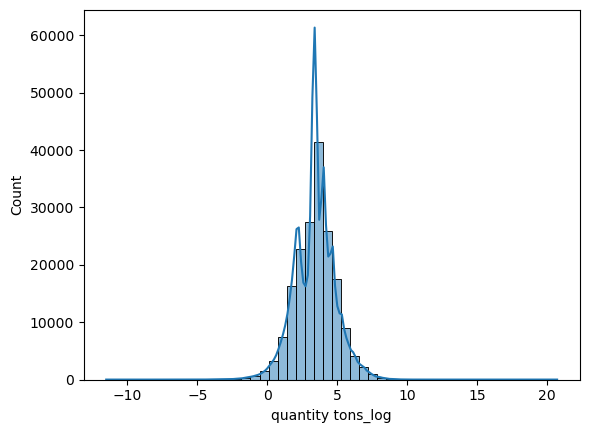

In [24]:
df['quantity tons_log'] = np.log(df['quantity tons'])
sns.histplot(df['quantity tons_log'],kde=True,bins=50)
plt.show()


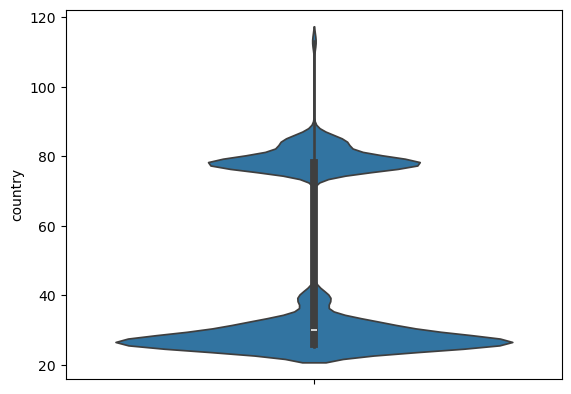

In [119]:
sns.violinplot(df['country'])
plt.show()

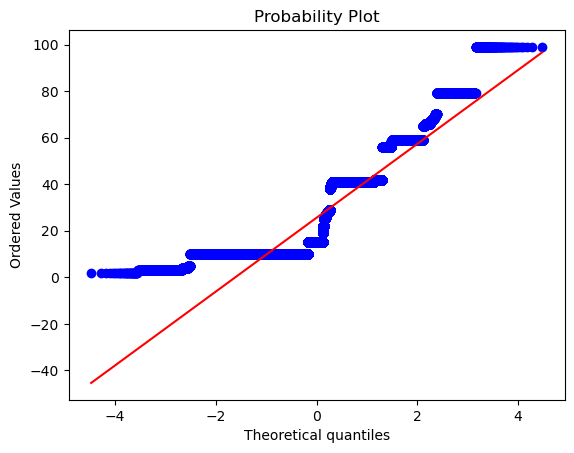

In [120]:
import scipy.stats as stats
stats.probplot(data['application'], dist="norm", plot=plt)
plt.show()

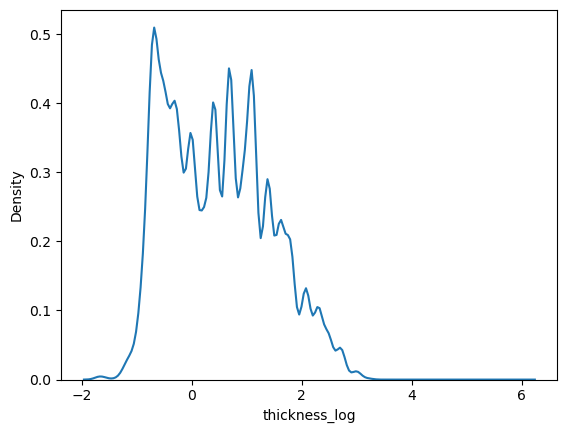

In [26]:
df['thickness_log'] = np.log(df['thickness'])
sns.kdeplot(df['thickness_log'])
plt.show()

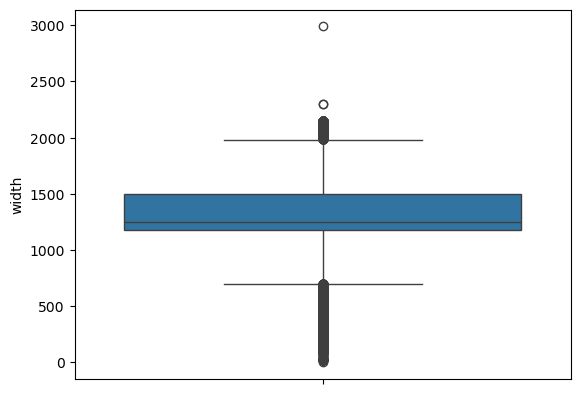

In [122]:
sns.boxplot(df['width'])
plt.show()

In [123]:
df['product_ref'].value_counts()

product_ref
611993        45718
164141591     28778
640665        27372
1670798778    18913
628377        18572
1668701718    15282
640405         9692
1671863738     5161
1332077137     4559
1693867550     1825
1668701376     1216
1671876026      823
628117          775
164337175       653
1668701698      374
1693867563      293
1282007633      281
1721130331      256
1665572374      202
628112          177
611728          148
1690738206      147
1722207579      125
640400           83
1668701725       56
164336407        49
611733           45
1690738219       19
1665584320       12
1665572032       10
1665584642        2
929423819         1
1665584662        1
Name: count, dtype: int64

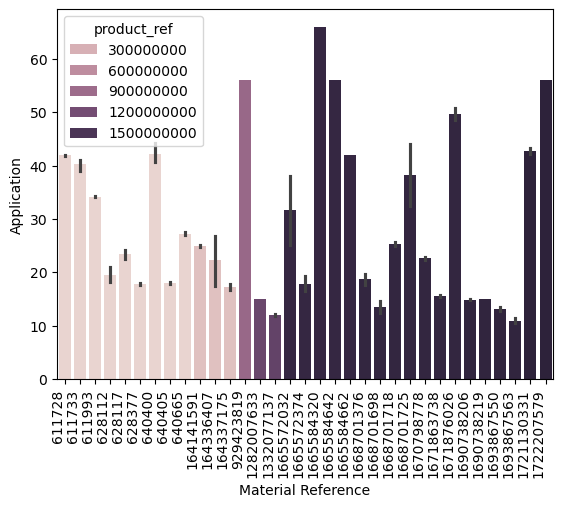

In [124]:
#bivariate analysis
sns.barplot(x='product_ref', y='application', data=df,hue='product_ref')
plt.xlabel('Material Reference')
plt.ylabel('Application')
plt.xticks(rotation=90, ha='right')
plt.show()

In [21]:
from sklearn.preprocessing import OrdinalEncoder
OE1 = OrdinalEncoder()
df['status'] = OE1.fit_transform(df[['status']])
OE2 = OrdinalEncoder()
df['item type'] = OE2.fit_transform(df[['item type']])

In [27]:
X=df[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df['selling_price_log']

In [28]:
from sklearn.preprocessing import StandardScaler
StdScaler = StandardScaler()
StdScaler.fit_transform(X)

array([[ 0.41506739,  0.70620108,  0.82144631, ..., -0.69225033,
        -0.75771563,  1.66790511],
       [ 2.25042993,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.29403459,  1.66498251],
       [ 1.77453529,  0.70620108,  1.76911846, ..., -0.61029817,
        -0.78103392, -0.65974878],
       ...,
       [ 1.34669579,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [-1.34846834,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [ 1.81043496,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127134, 9)
(54486, 9)
(127134,)
(54486,)


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.08464529083241956


In [191]:
y_pred_lr=lr.predict(X_test)

In [192]:
print(lr.score(X_test,y_test))

0.07805457024811924


In [193]:
print(metrics.r2_score(y_test,y_pred_lr))

0.07805457024811924


In [194]:
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4, random_state = 5)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

0.8737070361522715
0.886811832218784


In [195]:
gbr = GradientBoostingRegressor(n_estimators = 10, learning_rate = 0.1, random_state =5)
gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.7627437653996632
0.773871593198497


In [32]:
DecTreeReg = DecisionTreeRegressor()
# defining hyperparameters
grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=DecTreeReg, param_grid=grid, cv=5)
grid_search.fit(X_train, y_train)
print("hyperparameters:", grid_search.best_params_)

DecTreeReg_model = grid_search.best_estimator_
print('train score:',DecTreeReg_model.score(X_train,y_train))
y_pred = DecTreeReg_model.predict(X_test)

hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}
train score: 0.9318961876069389


In [33]:

#mse
metrics.mean_squared_error(y_test,y_pred)

0.02745540183075179

In [34]:
metrics.mean_absolute_error(y_test, y_pred)

0.12844095885224752

In [35]:
print('Decision Tree Regressor')
print("Test score:",metrics.r2_score(y_test,y_pred))

Decision Tree Regressor
Test score: 0.9152777211064637


In [200]:
data.status.value_counts()

status
Won                115996
Lost                34431
Not lost for AM     19566
Revised              4276
To be approved       4167
Draft                3120
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [36]:
#pickle
import pickle
with open('choosen_model_decTreeReg.pkl','wb') as m:
    pickle.dump(DecTreeReg_model,m)
with open('std_scaler.pkl','wb') as std:
    pickle.dump(StdScaler,std)
with open('item.pkl','wb') as item_type:
    pickle.dump(OE2,item_type)
with open('status.pkl','wb') as stat:
    pickle.dump(OE1,stat)

In [97]:
dt=data[data['status'].isin(['Won', 'Lost'])]

In [98]:
dt.status.value_counts()

status
Won     115996
Lost     34431
Name: count, dtype: int64

In [136]:
dt[dt['status'] == 0]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
171,C0BF3187-C4B3-4C63-ABDB-FCB0642A69C0,2021-04-01,8.718789,30223403.0,78.0,0.0,5.0,10.0,1.00,1500.0,unknown,1668701718,2021-07-01,1253.0
174,66D8E20C-AF4A-47D7-8FDD-51DEA6EA1F05,2021-04-01,39.553513,30165992.0,77.0,0.0,3.0,10.0,1.00,1500.0,FZPA004640,164141591,2021-08-01,1225.0
175,4532B5EF-0446-4880-BC8E-242E89AB8DD6,2021-04-01,11.454558,30223403.0,78.0,0.0,5.0,10.0,4.00,1500.0,unknown,1668701718,2021-07-01,1186.0
176,EE0BA8DE-38E9-4101-ADF9-B7B5B19A3525,2021-04-01,37.655526,30165992.0,77.0,0.0,3.0,10.0,0.80,1250.0,FZPA004640,164141591,2021-08-01,1249.0
179,1CDD04C3-6310-431F-B10A-F1C6B4F529DD,2021-04-01,10.291602,30223403.0,78.0,0.0,5.0,10.0,0.80,1500.0,unknown,1668701718,2021-07-01,1284.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181527,A30A09D6-6527-4BE3-B2EC-B795F94A70DD,2020-07-02,63.859521,30161559.0,30.0,0.0,3.0,10.0,5.85,1525.0,unknown,640665,2020-08-01,457.0
181529,BD9B7299-6FD2-4A9F-B336-5F677794A03F,2020-07-02,56.028562,30161559.0,30.0,0.0,3.0,10.0,7.85,1500.0,unknown,640665,2020-08-01,458.0
181531,BF93A919-5970-428F-9467-7A2D0573C5C6,2020-07-02,206.224110,30161559.0,30.0,0.0,3.0,10.0,3.85,1830.0,unknown,640665,2020-08-01,460.0
181533,FA54AED7-360E-4DED-96AA-F69D127267B8,2020-07-02,102.993849,30198408.0,25.0,0.0,3.0,10.0,1.40,1150.0,unknown,1668701718,2020-07-01,725.0


In [99]:
OE1 = OrdinalEncoder()
dt['status'] = OE1.fit_transform(dt[['status']])
OE2 = OrdinalEncoder()
dt['item type'] = OE2.fit_transform(dt[['item type']])

In [101]:
dt['item type'].value_counts()

item type
5.0    91944
3.0    52456
2.0     5032
6.0      504
1.0      463
0.0       27
4.0        1
Name: count, dtype: int64

In [102]:
dt['status'].value_counts()

status
1.0    115996
0.0     34431
Name: count, dtype: int64

In [119]:
X = dt[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]
y = dt['status']

In [120]:
StdScaler_class = StandardScaler()
StdScaler_class.fit_transform(X)

array([[-0.09143656,  0.09692364,  0.76981153, ..., -0.71019357,
        -0.7250777 ,  1.66740264],
       [ 1.52759497,  0.76065707,  0.76981153, ..., -0.83270143,
        -0.2835577 ,  1.66447894],
       [ 0.66147103, -0.62413849,  1.72296431, ..., -0.62852166,
        -0.74728153, -0.66113486],
       ...,
       [ 0.25768143, -0.8144202 ,  0.76981153, ..., -0.83270143,
        -0.30329023, -0.43316611],
       [-0.20464264, -0.7112492 ,  0.76981153, ..., -0.83270143,
        -0.30329023, -0.43316611],
       [ 0.70809693, -0.7525176 ,  0.76981153, ..., -0.83270143,
        -0.30329023, -0.43316611]])

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105298, 9)
(45129, 9)
(105298,)
(45129,)


In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [123]:
decTreeCLass = DecisionTreeClassifier(max_depth = 12, random_state = 1)
decTreeCLass.fit(X_train, y_train)
train_score = decTreeCLass.score(X_train, y_train)
test_score = decTreeCLass.score(X_test, y_test)
print(train_score)
print(test_score)

0.896474766852172
0.8812515234106671


In [124]:
KNClass = KNeighborsClassifier(n_neighbors = 6)
KNClass.fit(X_train, y_train)
print(KNClass.score(X_train, y_train))
print(KNClass.score(X_test, y_test))

0.9218503675283481
0.8900485275543442


In [125]:

GradientBoostClass = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.1,random_state = 5)
GradientBoostClass.fit(X_train, y_train)
print(GradientBoostClass.score(X_train, y_train))
print(GradientBoostClass.score(X_test, y_test))

0.8140325552242208
0.8147754215692792


In [126]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)
print(LogReg.score(X_train,y_train))
print(LogReg.score(X_test,y_test))

0.770888335960797
0.7716324314742183


In [127]:
randForestClass = RandomForestClassifier(n_estimators=20,max_depth=14,random_state=5)
randForestClass.fit(X_train,y_train)
print(randForestClass.score(X_train,y_train))
print(randForestClass.score(X_test,y_test))

0.9283937016847423
0.9025903521017528


In [128]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="binary:logistic", random_state=40)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_train, y_train)

0.6364956845621488

In [129]:
y_predic = xgb_model.predict(X_test)
mean_squared_error(y_test,y_predic)

0.07203164310752973

In [130]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.930909171486184


In [131]:
with open('RandForsClass_model.pkl', 'wb') as file:
    pickle.dump(randForestClass, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(StdScaler_class, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(OE2, f)